# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [2]:
with open(dirLoc + 'features.pkl', 'rb') as fin:
    classTrainFeatures = pickle.load(fin)

In [3]:
nSplits = 10
patience = 2
maxEpochs = 200

ensembleSize = 10
ensembleMode = 'loss'

compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':'modelSwish', 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs, 'mode':'classifier'}

print ("\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures])


Training on 31 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [4]:
with open(dirLoc + 'inputPipe.pkl', 'rb') as fin:
    inputPipe = pickle.load(fin)

In [5]:
trainData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'train.hdf5', "r+"),
                                    inputPipe=inputPipe, augRotMult=16)

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 7.877s 


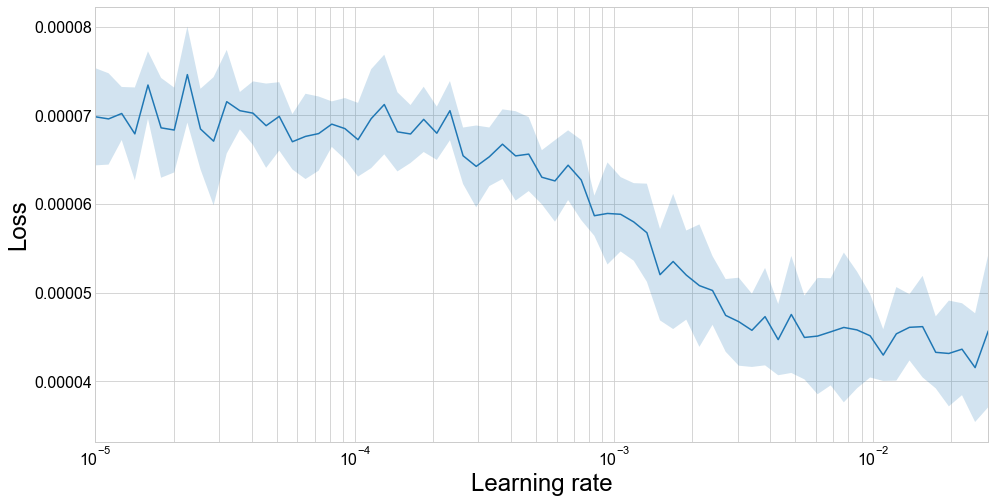

______________________________________



In [6]:
lrFinder = batchLRFind(trainData, getModel, modelParams, trainParams,
                       lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 4.017198361970142e-05
2 New best found: 3.6618717577340966e-05
3 New best found: 3.5746389000213104e-05
5 New best found: 3.493312961496059e-05
6 New best found: 3.473535088250502e-05
7 New best found: 3.464207927573402e-05
10 New best found: 3.442571843018787e-05
12 New best found: 3.3937721411881225e-05
13 New best found: 3.3848311495932745e-05
14 New best found: 3.377203920516423e-05
15 New best found: 3.375495769842089e-05
21 New best found: 3.367854410988134e-05
23 New best found: 3.3413332737658024e-05
24 New best found: 3.339650649130361e-05
25 New best found: 3.329671590827615e-05
26 New best found: 3.312499694047937e-05
27 New best found: 3.3083210907508283e-05
29 New best found: 3.299273368224188e-05
30 New best found: 3.29903286608876e-05
31 New best found: 3.298731426928546e-05
44 New best found: 3.296921996578312e-05
45 New best found: 3.286379806051

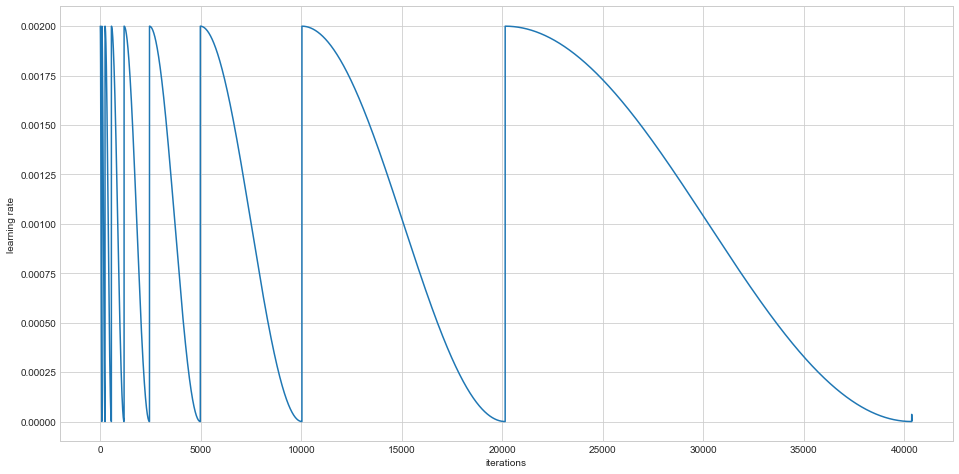

Fold took 573.123s

Running fold 2 / 10
1 New best found: 4.044265936934222e-05
2 New best found: 3.702798694082755e-05
3 New best found: 3.6195297206784304e-05
5 New best found: 3.5490846275830114e-05
6 New best found: 3.5070764584300814e-05
7 New best found: 3.499549713071065e-05
9 New best found: 3.460859448199795e-05
10 New best found: 3.457847917789016e-05
11 New best found: 3.4236516722928336e-05
12 New best found: 3.421599228408367e-05
13 New best found: 3.392802911004303e-05
14 New best found: 3.379058003414028e-05
15 New best found: 3.372798044195566e-05
21 New best found: 3.366289778048625e-05
22 New best found: 3.3580621231799916e-05
23 New best found: 3.349052675946644e-05
25 New best found: 3.3373703372482397e-05
26 New best found: 3.313674712779181e-05
27 New best found: 3.306674735017831e-05
28 New best found: 3.2963006446408405e-05
30 New best found: 3.2948897684497e-05
43 New best found: 3.2935344859893086e-05
47 New best found: 3.288779838746955e-05
49 New best found:

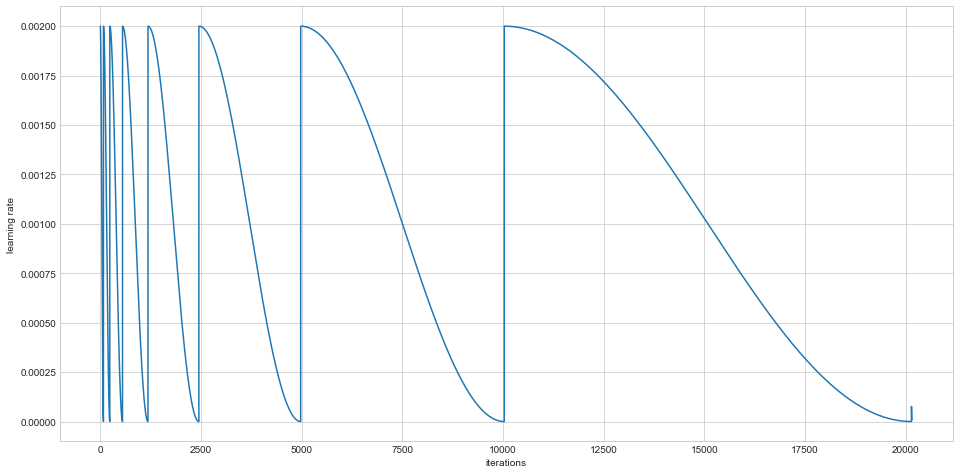

Fold took 292.151s

Running fold 3 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118188). Check your callbacks.
  % delta_t_median)


1 New best found: 4.1111435471585285e-05
2 New best found: 3.749072585817505e-05
3 New best found: 3.67250983646999e-05
5 New best found: 3.57994600560187e-05
6 New best found: 3.543623412424373e-05
7 New best found: 3.521761385954091e-05
9 New best found: 3.490274848737769e-05
11 New best found: 3.489097434854213e-05
12 New best found: 3.437184485778835e-05
13 New best found: 3.413639130647397e-05
14 New best found: 3.3927693601249185e-05
15 New best found: 3.39274449563563e-05
22 New best found: 3.390854061726349e-05
23 New best found: 3.368295853223337e-05
24 New best found: 3.347077654093565e-05
27 New best found: 3.331058186215013e-05
28 New best found: 3.32554159469305e-05
29 New best found: 3.323062005307564e-05
30 New best found: 3.319251620617541e-05
45 New best found: 3.314941474044168e-05
47 New best found: 3.3051806808201505e-05
50 New best found: 3.2940738820881346e-05
52 New best found: 3.287263324757856e-05
54 New best found: 3.282562281187316e-05
55 New best found: 3.27

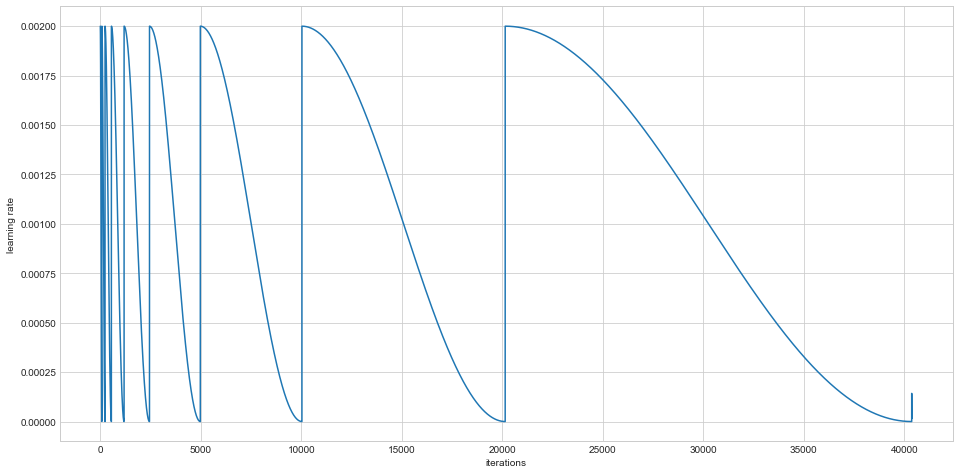

Fold took 589.656s

Running fold 4 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121862). Check your callbacks.
  % delta_t_median)


1 New best found: 4.138348287233384e-05
2 New best found: 3.6278714557556666e-05
3 New best found: 3.5485570739547254e-05
5 New best found: 3.461651710240403e-05
6 New best found: 3.408475070973509e-05
7 New best found: 3.399127435695846e-05
8 New best found: 3.391818826203234e-05
9 New best found: 3.3712391565495636e-05
11 New best found: 3.3486170704418324e-05
12 New best found: 3.3067835796100556e-05
13 New best found: 3.2903561477723995e-05
21 New best found: 3.2857316092122346e-05
22 New best found: 3.270374566855026e-05
23 New best found: 3.266855767869856e-05
24 New best found: 3.245965585228987e-05
25 New best found: 3.2382758126186675e-05
26 New best found: 3.230367679352639e-05
27 New best found: 3.229707341306493e-05
29 New best found: 3.2225361904420424e-05
30 New best found: 3.2180785141827076e-05
31 New best found: 3.217462657921715e-05
47 New best found: 3.1835447264893446e-05
52 New best found: 3.179117623221828e-05
54 New best found: 3.169862892391393e-05
56 New best f

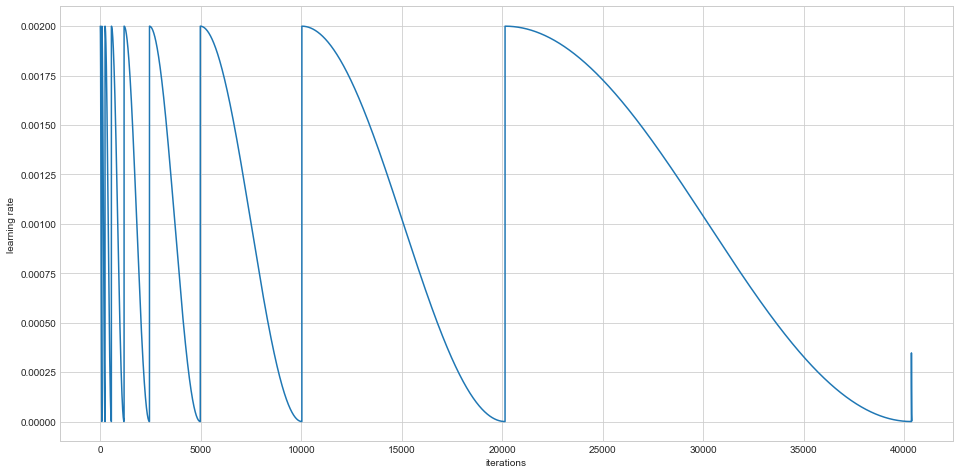

Fold took 605.278s

Running fold 5 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132244). Check your callbacks.
  % delta_t_median)


1 New best found: 4.0245231287553906e-05
2 New best found: 3.687942233227659e-05
3 New best found: 3.605992525554029e-05
5 New best found: 3.5895035581779664e-05
6 New best found: 3.465309241437353e-05
7 New best found: 3.452303827652941e-05
9 New best found: 3.448255376715679e-05
11 New best found: 3.443990364903584e-05
12 New best found: 3.399135075014783e-05
13 New best found: 3.3619292506773493e-05
14 New best found: 3.3547155414998995e-05
15 New best found: 3.3497603255091234e-05
21 New best found: 3.332972998177866e-05
24 New best found: 3.305058287660358e-05
25 New best found: 3.301741547329584e-05
26 New best found: 3.298968059680192e-05
28 New best found: 3.293982063332805e-05
29 New best found: 3.288820927555207e-05
30 New best found: 3.2857661215530246e-05
31 New best found: 3.2850270030030514e-05
48 New best found: 3.273942049854668e-05
50 New best found: 3.263768744072877e-05
53 New best found: 3.263608025808935e-05
54 New best found: 3.259634160785936e-05
55 New best foun

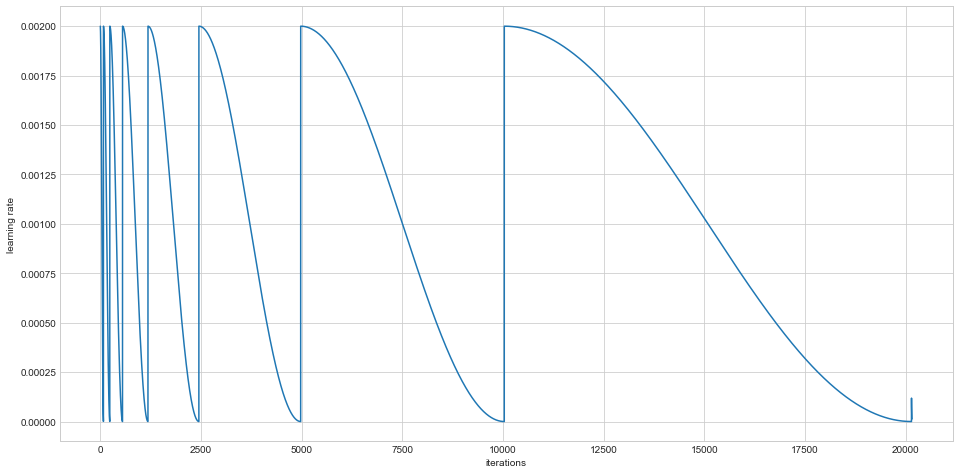

Fold took 290.584s

Running fold 6 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134209). Check your callbacks.
  % delta_t_median)


1 New best found: 4.146279145497829e-05
2 New best found: 3.7765127482998653e-05
3 New best found: 3.6814497740124355e-05
4 New best found: 3.6461615916050504e-05
5 New best found: 3.613385079370346e-05
6 New best found: 3.556738902261713e-05
7 New best found: 3.527443752536783e-05
11 New best found: 3.498537249688525e-05
12 New best found: 3.4769205340126066e-05
13 New best found: 3.467860870150617e-05
14 New best found: 3.4377281411434526e-05
15 New best found: 3.435472474229755e-05
21 New best found: 3.411683501326479e-05
22 New best found: 3.400878288957756e-05
25 New best found: 3.396807884273585e-05
26 New best found: 3.3786615591088776e-05
28 New best found: 3.366251232218929e-05
29 New best found: 3.359393832361093e-05
31 New best found: 3.359167672897456e-05
46 New best found: 3.3356623396684884e-05
48 New best found: 3.328864455688745e-05
52 New best found: 3.32246054589632e-05
56 New best found: 3.3145818920456805e-05
57 New best found: 3.310224978486076e-05
59 New best foun

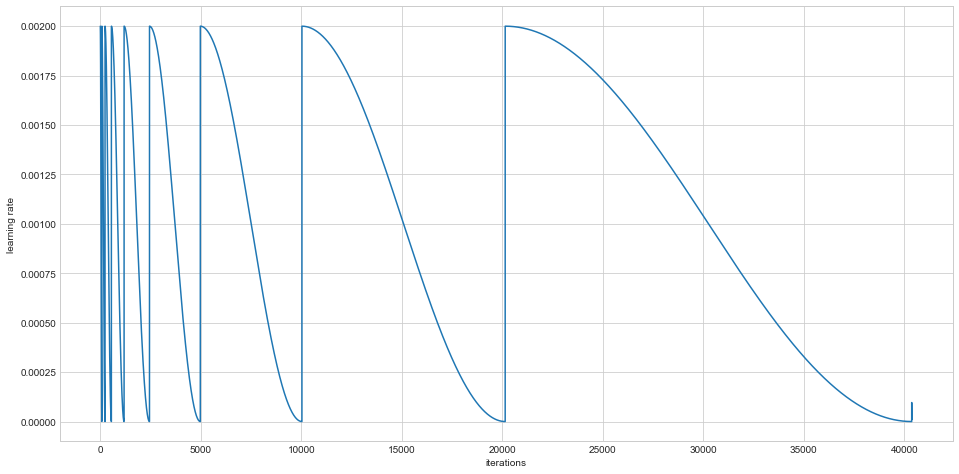

Fold took 590.159s

Running fold 7 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139665). Check your callbacks.
  % delta_t_median)


1 New best found: 3.892526675190311e-05
2 New best found: 3.5709708380454684e-05
3 New best found: 3.512754340481479e-05
4 New best found: 3.5050901293288915e-05
5 New best found: 3.429582152166404e-05
6 New best found: 3.381211391752004e-05
7 New best found: 3.355135866586352e-05
10 New best found: 3.341058839723701e-05
11 New best found: 3.3023849230085036e-05
12 New best found: 3.28040826767392e-05
13 New best found: 3.2625659296900264e-05
14 New best found: 3.249111295735929e-05
15 New best found: 3.240967161400477e-05
22 New best found: 3.2244448151323016e-05
23 New best found: 3.211556556925643e-05
25 New best found: 3.181241135171149e-05
27 New best found: 3.1778249623312146e-05
29 New best found: 3.169528150028782e-05
30 New best found: 3.165843838651199e-05
31 New best found: 3.165800342248986e-05
41 New best found: 3.161334590258775e-05
45 New best found: 3.149094559194054e-05
48 New best found: 3.140714604232926e-05
50 New best found: 3.1374103525013196e-05
51 New best found

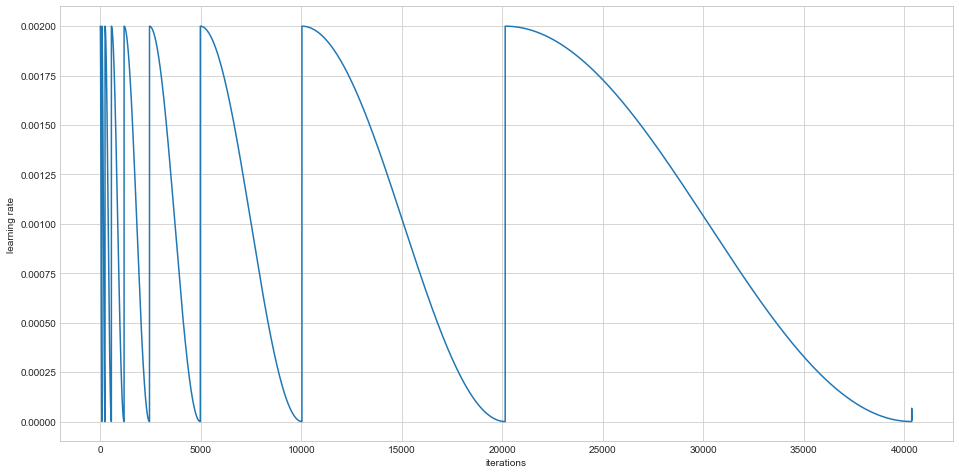

Fold took 590.997s

Running fold 8 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150962). Check your callbacks.
  % delta_t_median)


1 New best found: 4.0297250228158795e-05
2 New best found: 3.6556138540544996e-05
3 New best found: 3.611938573279082e-05
4 New best found: 3.591534503336697e-05
5 New best found: 3.5571628686118825e-05
6 New best found: 3.482439866317056e-05
7 New best found: 3.4712718782654215e-05
10 New best found: 3.451400278460745e-05
11 New best found: 3.411518429719847e-05
12 New best found: 3.3966643148783016e-05
13 New best found: 3.3892782065639896e-05
14 New best found: 3.3868228724363446e-05
15 New best found: 3.381896135393836e-05
20 New best found: 3.359263796433195e-05
22 New best found: 3.3442054406790565e-05
25 New best found: 3.344096918865339e-05
26 New best found: 3.327019115345281e-05
27 New best found: 3.316017715130133e-05
28 New best found: 3.312705089036389e-05
29 New best found: 3.303366396369875e-05
30 New best found: 3.301804370475928e-05
43 New best found: 3.3000436168380875e-05
48 New best found: 3.291762042237738e-05
50 New best found: 3.284250007094275e-05
51 New best fo

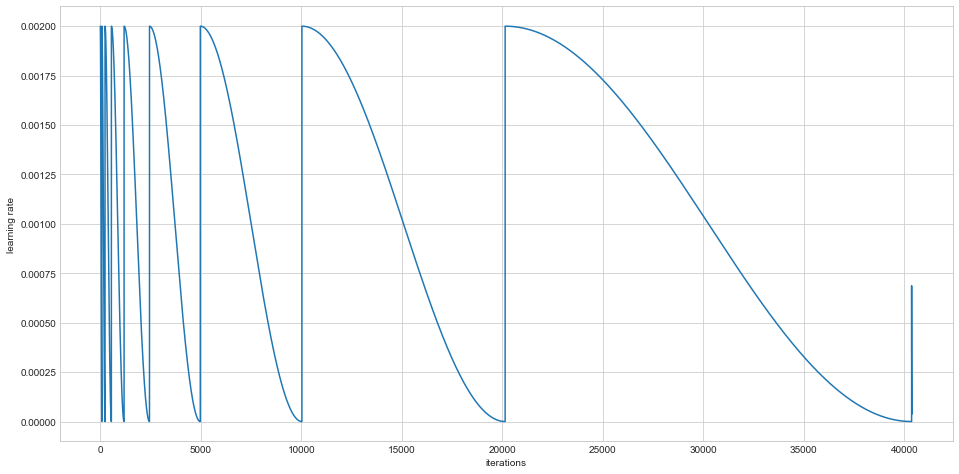

Fold took 617.992s

Running fold 9 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.166899). Check your callbacks.
  % delta_t_median)


1 New best found: 4.202938028612756e-05
2 New best found: 3.753247474125588e-05
3 New best found: 3.716001461126113e-05
4 New best found: 3.698515959190565e-05
5 New best found: 3.67088336292644e-05
6 New best found: 3.580121125360446e-05
7 New best found: 3.5677072971183265e-05
10 New best found: 3.517806274981176e-05
11 New best found: 3.513342616836761e-05
12 New best found: 3.474188959060374e-05
13 New best found: 3.4511553295403284e-05
14 New best found: 3.4403205936221624e-05
21 New best found: 3.4307450035350174e-05
23 New best found: 3.430125861490044e-05
24 New best found: 3.4054593289206456e-05
25 New best found: 3.376718245152655e-05
28 New best found: 3.366534070871977e-05
29 New best found: 3.357253576857381e-05
30 New best found: 3.3536882111722716e-05
31 New best found: 3.3528757882921e-05
48 New best found: 3.348133760246162e-05
50 New best found: 3.344491582583216e-05
52 New best found: 3.3295967186817505e-05
54 New best found: 3.3290255328885254e-05
56 New best found:

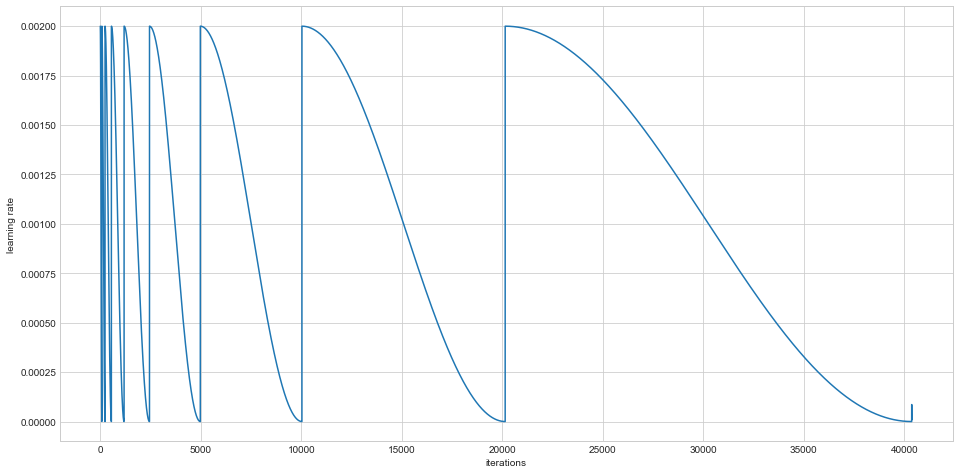

Fold took 615.824s

Running fold 10 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.184161). Check your callbacks.
  % delta_t_median)


1 New best found: 3.9629510427381225e-05
2 New best found: 3.595497011491342e-05
3 New best found: 3.5223727033619395e-05
4 New best found: 3.446726255324188e-05
5 New best found: 3.397843860313232e-05
6 New best found: 3.362265235206077e-05
7 New best found: 3.359723000135307e-05
9 New best found: 3.3219992897032396e-05
11 New best found: 3.2878050984679985e-05
12 New best found: 3.27604628681845e-05
13 New best found: 3.242612003341585e-05
14 New best found: 3.241865209151599e-05
15 New best found: 3.24162394870766e-05
23 New best found: 3.200455333519739e-05
25 New best found: 3.190539301070221e-05
27 New best found: 3.185153793930689e-05
28 New best found: 3.171272860844754e-05
30 New best found: 3.171150513356354e-05
31 New best found: 3.1705119633793285e-05
46 New best found: 3.157570514972428e-05
48 New best found: 3.154749294641632e-05
50 New best found: 3.151721242482091e-05
52 New best found: 3.144183495820176e-05
53 New best found: 3.125030807409981e-05
57 New best found: 3.

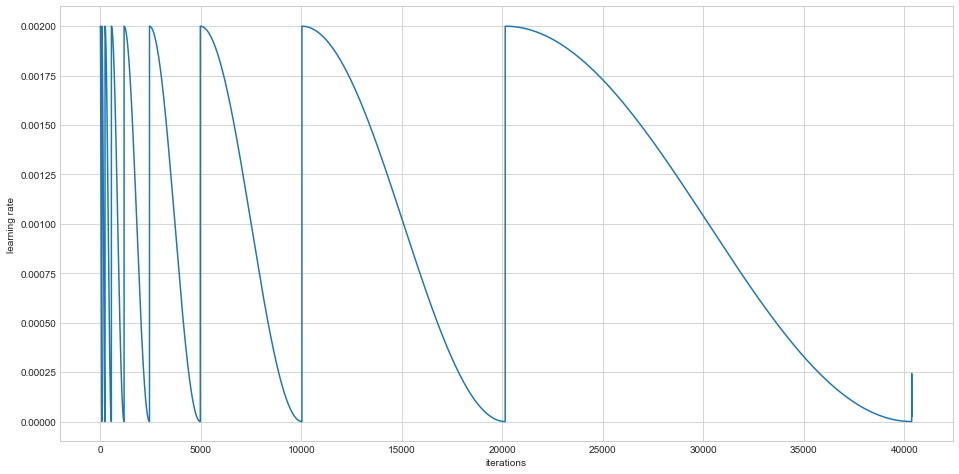

Fold took 615.235s


______________________________________
Training finished
Cross-validation took 5382.366s 


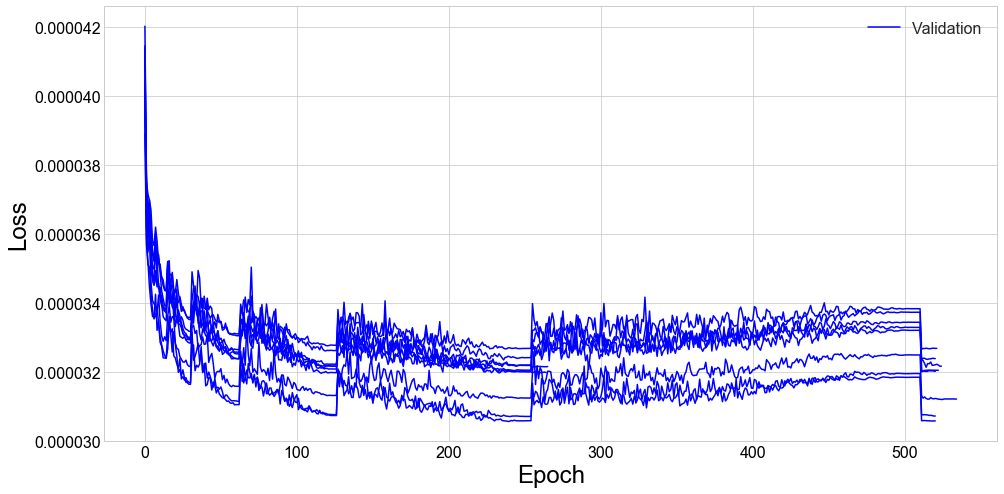

Mean loss = 3.18e-05 +- 2e-07
Mean wAUC = 0.0633 +- 0.0008
Mean AUC = 0.0985 +- 0.001
Mean AMS = 3.98 +- 0.07
Mean cut = 0.966 +- 0.006
______________________________________



In [7]:
results, histories = batchTrainClassifier(trainData, nSplits, getModel, 
                                          {**modelParams, 'compileArgs':{**compileArgs, 'lr':2e-3}},
                                          trainParams, trainOnWeights=True, maxEpochs=maxEpochs,
                                          cosAnnealMult=2, plotLR=1, reduxDecay=1,
                                          patience=patience, verbose=1, amsSize=250000)

The impact of data augmentation is pretty clear. Comparign the training here to that of the the CRL Swish model without augmentation we can see that we effectively gain another LR cycles worth of training epochs before we start overfitting, which allows the networks to reach much lower looses (3.18e-5 c.f. 3.23e-5) and a higher AMSs (3.98 c.f. 3.71)

## Construct ensemble

In [8]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [9]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 6 with loss = 3.05790968472138e-05
Model 1 is 9 with loss = 3.071940019725458e-05
Model 2 is 3 with loss = 3.1218581673601875e-05
Model 3 is 4 with loss = 3.197626893161214e-05
Model 4 is 2 with loss = 3.201772066805202e-05
Model 5 is 0 with loss = 3.2048394511202774e-05
Model 6 is 1 with loss = 3.214294772890735e-05
Model 7 is 7 with loss = 3.21502356697217e-05
Model 8 is 5 with loss = 3.236302078003064e-05
Model 9 is 8 with loss = 3.267671429690958e-05


## Response on validation data without TTA

In [10]:
valData = BatchYielder(h5py.File(dirLoc + 'val.hdf5', "r+"))

In [11]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000727888121199976s per sample

Predicting batch 2 out of 10
Prediction took 0.00014242329980006615s per sample

Predicting batch 3 out of 10
Prediction took 0.00016024321679997228s per sample

Predicting batch 4 out of 10
Prediction took 0.00015137600919988472s per sample

Predicting batch 5 out of 10
Prediction took 0.0002504120202000195s per sample

Predicting batch 6 out of 10
Prediction took 0.00017552998999999545s per sample

Predicting batch 7 out of 10
Prediction took 0.00013587427180009398s per sample

Predicting batch 8 out of 10
Prediction took 0.00016215081959999224s per sample

Predicting batch 9 out of 10
Prediction took 0.00014871191860002s per sample

Predicting batch 10 out of 10
Prediction took 0.00020740878240012534s per sample



In [12]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source))))

Testing ROC AUC: unweighted 0.9036164417187911, weighted 0.9360637063712465


In [13]:
amsScanSlow(convertToDF(valData.source))

50000 candidates loaded


(3.904678569217358, 0.9597285)

In [14]:
%%time
bootstrapMeanAMS(convertToDF(valData.source), N=512)

50000 candidates loaded

Mean AMS=4.0+-0.2, at mean cut of 0.96+-0.01
Exact mean cut 0.9617856123950332, corresponds to AMS of 3.8858269819333286
CPU times: user 684 ms, sys: 8.5 s, total: 9.19 s
Wall time: 38.5 s


(4.0, 0.96)

With test-time augmentation we improve on 4_Model_Swish_Cyclical-LR in all metrics on validation data: overall AMS 3.77->3.91, AMS corresponding to mean cut 3.72->3.88.

## Response on validation data with TTA

In [15]:
valData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'val.hdf5', "r+"), inputPipe=inputPipe,
                                  rotate = True, reflect = True, augRotMult=8)

In [16]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.004737834862599993s per sample

Predicting batch 2 out of 10
Prediction took 0.004787908256999981s per sample

Predicting batch 3 out of 10
Prediction took 0.00472892828339991s per sample

Predicting batch 4 out of 10
Prediction took 0.00471334293380005s per sample

Predicting batch 5 out of 10
Prediction took 0.0048470235139999205s per sample

Predicting batch 6 out of 10
Prediction took 0.004686572345999957s per sample

Predicting batch 7 out of 10
Prediction took 0.004735151436799969s per sample

Predicting batch 8 out of 10
Prediction took 0.0047189097217999005s per sample

Predicting batch 9 out of 10
Prediction took 0.004729269907999879s per sample

Predicting batch 10 out of 10
Prediction took 0.004849481185599871s per sample



In [17]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source))))

Testing ROC AUC: unweighted 0.9037606723092108, weighted 0.9360955252424237


In [18]:
amsScanSlow(convertToDF(valData.source))

50000 candidates loaded


(3.966941152482784, 0.959765)

In [19]:
%%time
bootstrapMeanAMS(convertToDF(valData.source), N=512)

50000 candidates loaded

Mean AMS=4.0+-0.2, at mean cut of 0.962+-0.01
Exact mean cut 0.9619597619166598, corresponds to AMS of 3.9122062307167265
CPU times: user 458 ms, sys: 8.84 s, total: 9.29 s
Wall time: 38.6 s


(4.0, 0.962)

Adding test-time augmentation provides further benefits: overall AMS 3.91->3.96, AMS corresponding to mean cut 3.88->3.91.

# Test scoring
We can also try running this over the test data

In [20]:
testData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'testing.hdf5', "r+"), inputPipe=inputPipe,
                                   rotate = True, reflect = True, augRotMult=8)

In [21]:
%%time
batchEnsemblePredict(ensemble, weights, testData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.004569410138109097s per sample

Predicting batch 2 out of 10
Prediction took 0.00469888255592728s per sample

Predicting batch 3 out of 10
Prediction took 0.004616005458963628s per sample

Predicting batch 4 out of 10
Prediction took 0.004634554086472732s per sample

Predicting batch 5 out of 10
Prediction took 0.004646317169909096s per sample

Predicting batch 6 out of 10
Prediction took 0.004590998027199996s per sample

Predicting batch 7 out of 10
Prediction took 0.004510114061981816s per sample

Predicting batch 8 out of 10
Prediction took 0.004521696878800007s per sample

Predicting batch 9 out of 10
Prediction took 0.004580232414545455s per sample

Predicting batch 10 out of 10
Prediction took 0.004632844474400024s per sample

CPU times: user 1h 13min 25s, sys: 5min 14s, total: 1h 18min 39s
Wall time: 42min 10s


In [28]:
scoreTestOD(testData.source, 0.9619597619166598)

Public:Private AMS: 3.6485448160879015 : 3.8176568398761934


(3.6485448160879015, 3.8176568398761934)

Using the cuts we optimised by bootstrapping the validation data, we end up with a private score which would have beaten the winning entry (3.819 c.f. 3.806). It would be nice if the public score were higher, though.

# Save/Load

In [30]:
name = "weights/Swish_CLR_TTA"

In [31]:
saveEnsemble(name, ensemble, weights, compileArgs, overwrite=1)

In [ ]:
ensemble, weights, compileArgs, _, _ = loadEnsemble(name)